<IPython.core.display.Javascript object>


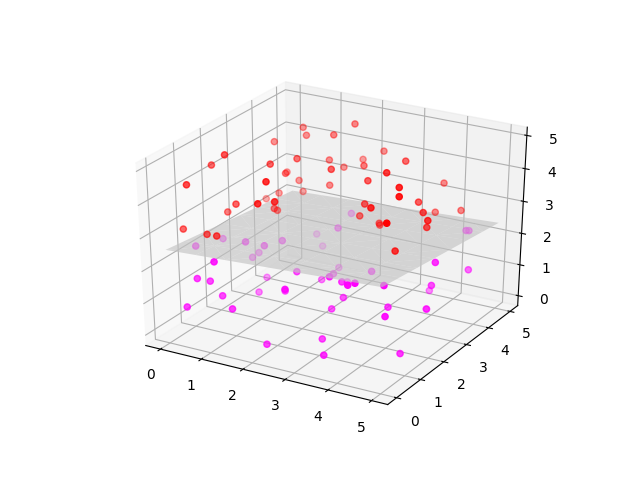

<IPython.core.display.Javascript object>


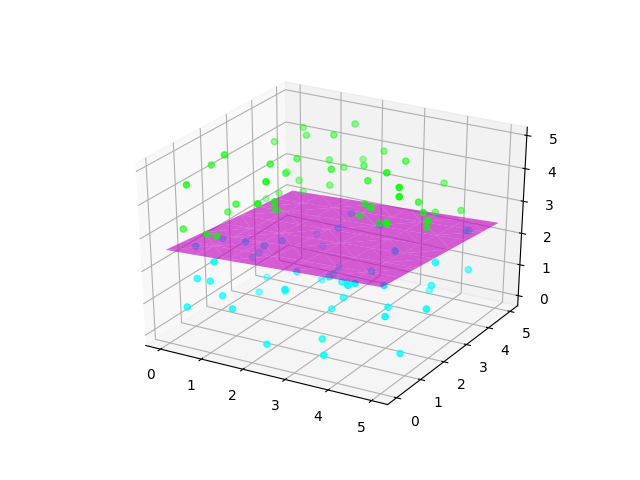

0.04


In [8]:
%matplotlib notebook

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
from ml_tps.tp3.space_generation import BooleanPlane, Point

EPOCH = 5000
POINTS = 100
unit = 7


fig = plt.figure()
ax = fig.gca(projection='3d')

plane = BooleanPlane()

xs = np.arange(unit + 1) * 5 / unit
ys = np.arange(unit + 1) * 5 / unit

points = list(filter(lambda p: -1.5 < p.z < 6, [plane.update_z(Point(x,y,0)) for y in ys for x in xs]))


xss = [p.x for p in points]
yss = [p.y for p in points]
zss = [p.z for p in points]

points = [Point.generate_point() for _ in range(POINTS)]
pointsUP = list(filter(plane.classify, points))
pointsDO = list(filter(lambda p: not plane.classify(p), points))


xsUP = [point.x for point in pointsUP]
ysUP = [point.y for point in pointsUP]
zsUP = [point.z for point in pointsUP]
xsDN = [point.x for point in pointsDO]
ysDN = [point.y for point in pointsDO]
zsDN = [point.z for point in pointsDO]

ax.plot_trisurf(xss, yss, zss, color="#FFFFFFA0")
ax.scatter(xsUP, ysUP, zsUP, c="#FF0000")
ax.scatter(xsDN, ysDN, zsDN, c="#FF00FF")
plt.show()


#override = {"epoch" : EPOCH,
#            "input":
#                [{"pattern": [point.x, point.y], "response": 1 if plane.classify(point) else -1} for point in points]
#            }
#net = mainNet(override)

from ml_tps.utils.neural_net_utils.SimplePerceptron import SimplePerceptron, Pattern
patterns = [Pattern([point.x, point.y, point.z], 1 if plane.classify(point) else -1) for point in points]
pppp = SimplePerceptron(3,0.1,0.025,patterns,EPOCH)
pppp.train()

pointsUPn = \
    list(
        filter(
            lambda point: pppp.get_value(Pattern([point.x, point.y, point.z], 1 if plane.classify(point) else -1)) == 1 , points))
pointsDOn = \
    list(
        filter(
            lambda point: pppp.get_value(Pattern([point.x, point.y, point.z], 1 if plane.classify(point) else -1)) == -1, points))

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(xss, yss, zss, color="#ff00ffA0")

xsUPn = [point.x for point in pointsUPn]
ysUPn = [point.y for point in pointsUPn]
zsUPn = [point.z for point in pointsUPn]
xsDNn = [point.x for point in pointsDOn]
ysDNn = [point.y for point in pointsDOn]
zsDNn = [point.z for point in pointsDOn]

ax.scatter(xsUPn, ysUPn, zsUPn, c="#00FF00")
ax.scatter(xsDNn, ysDNn, zsDNn, c="#00FFFF")
# print(len(net.errors))
plt.show()
print(pppp.error)